# Text detector

Text detector is a simple model to detect text in an image. In this case, the model is fine-tuned for detecting text inside a comic/manga page.

This notebook will show you how to use the `TextDetector` modules and plot the returned outputs.

## 1. Import

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from mltranslator import PROJECT_DIR
from mltranslator.modules.detection import TextDetector

## 2. Setup

Create a `TextDetector` model and load in an image for testing.

In [4]:
# model_path = os.path.join(PROJECT_DIR, "mltranslator/models/detection/best.pt")
text_detector = TextDetector(
    # use parameter below to load custom model
    # yolo_model_path=model_path
)

In [5]:
# You can modify the path below
image_path = f"{PROJECT_DIR}/dataset/test/test2.jpg"
image = Image.open(image_path).convert("RGB")

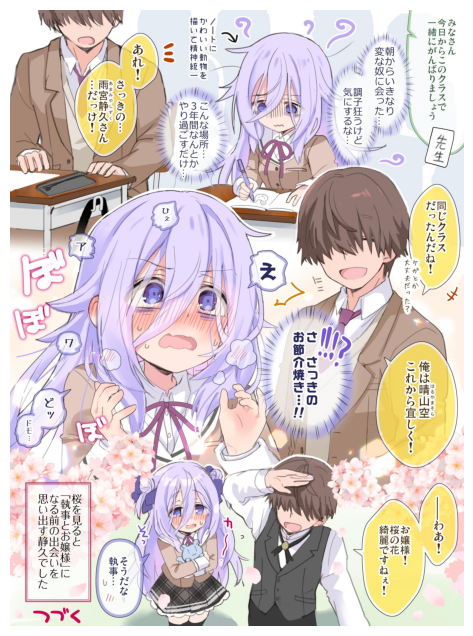

In [6]:
# show image original image
fig, _ = plt.subplots(1,1, figsize=(8,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
plt.show()

## 3. Result

In [7]:
debug_image, cropped_images = text_detector.get_output_and_cropped_images(image)
result_api = text_detector.get_detect_output_api(image)

tensor([0.9205, 0.9172, 0.9153, 0.9037, 0.8920, 0.8911, 0.8901, 0.8897, 0.8733, 0.8543, 0.8297, 0.8102, 0.8068, 0.7721, 0.7382, 0.7359, 0.6617, 0.6581, 0.6013, 0.5745, 0.5332, 0.4392, 0.3189, 0.3079, 0.2362, 0.2333, 0.2164, 0.1943, 0.1891, 0.1386, 0.1375])
tensor([0.9205, 0.9172, 0.9153, 0.9037, 0.8920, 0.8911, 0.8901, 0.8897, 0.8733, 0.8543, 0.8297, 0.8102, 0.8068, 0.7721, 0.7382, 0.7359, 0.6617, 0.6581, 0.6013, 0.5745, 0.5332, 0.4392, 0.3189, 0.3079, 0.2362, 0.2333, 0.2164, 0.1943, 0.1891, 0.1386, 0.1375])


The `result_api` contains the output of the TextDetector model `(x_min, y_min, x_max, y_max)`

In [8]:
# show bounding box result
display(result_api)

[(1115, 20, 1231, 171),
 (892, 24, 1048, 362),
 (1056, 27, 1194, 174),
 (2101, 33, 2260, 571),
 (1057, 99, 1155, 175),
 (606, 165, 680, 362),
 (1827, 177, 1955, 656),
 (378, 346, 587, 682),
 (1670, 384, 1791, 690),
 (840, 456, 1009, 832),
 (2131, 621, 2217, 791),
 (2086, 961, 2213, 1344),
 (757, 993, 813, 1081),
 (8, 1046, 416, 1680),
 (7, 1167, 301, 1673),
 (1978, 1257, 2075, 1542),
 (1551, 1591, 1733, 1802),
 (1406, 1597, 1736, 2089),
 (1406, 1600, 1569, 2091),
 (1982, 1775, 2153, 2255),
 (164, 1960, 224, 2073),
 (165, 1960, 224, 2073),
 (325, 2052, 489, 2200),
 (64, 2065, 114, 2176),
 (63, 2065, 116, 2178),
 (127, 2442, 362, 2942),
 (2133, 2584, 2199, 2760),
 (635, 2597, 703, 2718),
 (1853, 2599, 2027, 2976),
 (478, 2766, 602, 3003),
 (103, 3021, 366, 3117)]

In [12]:
result_api[7]

(378, 346, 587, 682)

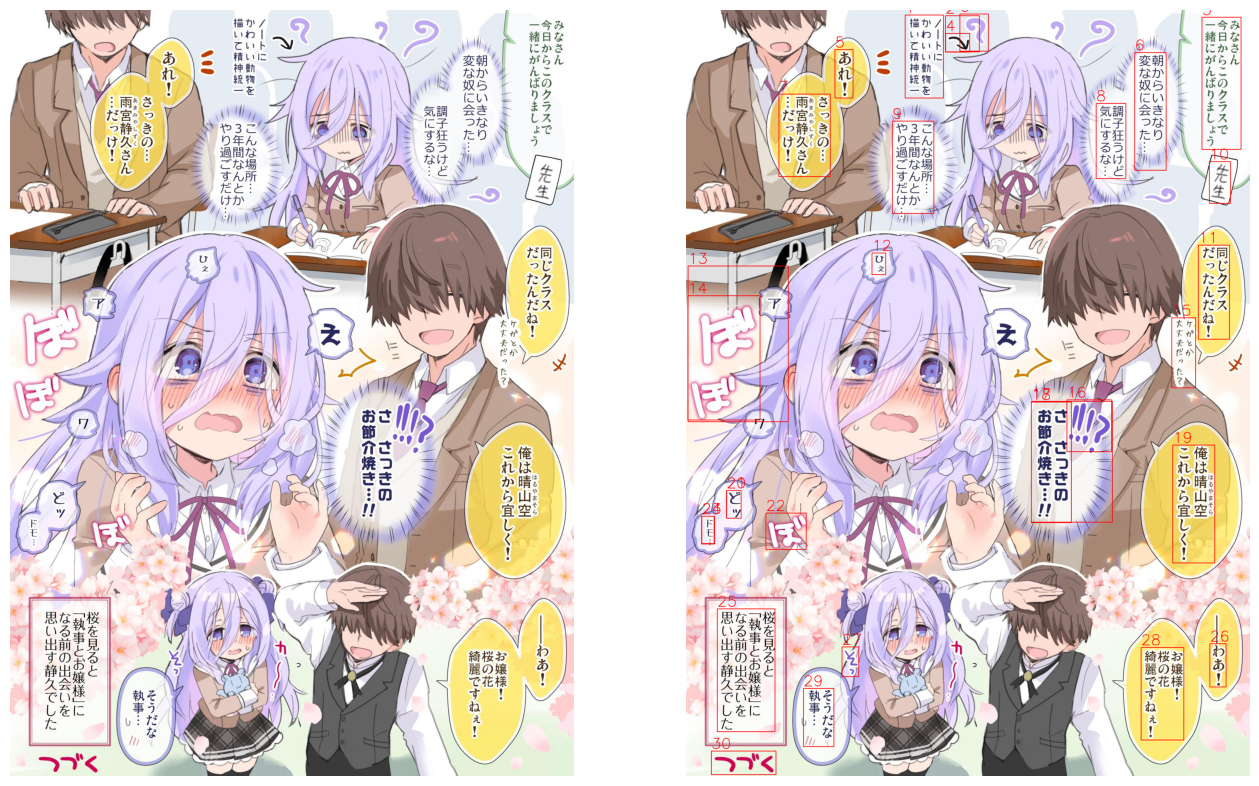

In [11]:
# show detected image and original image side by side
fig, _ = plt.subplots(1,2, figsize=(16,16))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[1].imshow(debug_image)
fig.axes[1].axis("off")
plt.show()

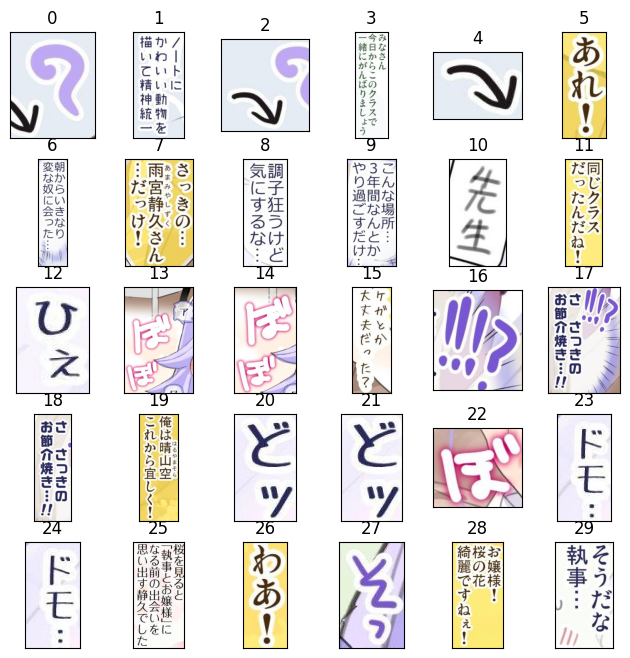

In [10]:
# plot all the cropped images
r = int(np.sqrt(len(cropped_images)))
c = int(np.round(len(cropped_images)/r))
fig, _ = plt.subplots(r,c, figsize=(8,8))
for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if i >= len(cropped_images):
        ax.axis("off")
        continue
    ax.set_title(i)
    ax.imshow(cropped_images[i])

    
plt.show()